<a href="https://colab.research.google.com/github/EhsanulHaque75/ResearchCode/blob/main/dengue_code_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('Dengue diseases dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1003 non-null   int64  
 1   Sex                 1003 non-null   object 
 2   Haemoglobin         1003 non-null   float64
 3   WBC Count           979 non-null    float64
 4   Differential Count  1003 non-null   int64  
 5   RBC PANEL           1003 non-null   int64  
 6   Platelet Count      986 non-null    float64
 7   PDW                 984 non-null    float64
 8   Final Output        989 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 70.7+ KB


In [5]:
from sklearn.impute import KNNImputer
import pandas as pd


columns_to_impute = ['PDW', 'Platelet Count', 'WBC Count']


imputer = KNNImputer(n_neighbors=5)


df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

print(df.isnull().sum())


Age                    0
Sex                    0
Haemoglobin            0
WBC Count              0
Differential Count     0
RBC PANEL              0
Platelet Count         0
PDW                    0
Final Output          14
dtype: int64


In [6]:
df = df.dropna()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 1002
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 989 non-null    int64  
 1   Sex                 989 non-null    object 
 2   Haemoglobin         989 non-null    float64
 3   WBC Count           989 non-null    float64
 4   Differential Count  989 non-null    int64  
 5   RBC PANEL           989 non-null    int64  
 6   Platelet Count      989 non-null    float64
 7   PDW                 989 non-null    float64
 8   Final Output        989 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 77.3+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode, iqr, entropy, zscore

# Select numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Compute statistics
stats_df = pd.DataFrame({
    'Mean': numeric_df.mean(),
    'Median': numeric_df.median(),
    'Max': numeric_df.max(),
    'Min': numeric_df.min(),
    'Std Dev': numeric_df.std(),
    'Variance': numeric_df.var(),
    'Skewness': numeric_df.apply(skew),
    'Kurtosis': numeric_df.apply(kurtosis),
    'IQR': numeric_df.apply(iqr),
    'Entropy': numeric_df.apply(lambda x: entropy(np.histogram(x, bins=10)[0])),
    'Z-score Max': numeric_df.apply(lambda x: zscore(x).max()),
})

# Print statistics
print(stats_df)


                             Mean   Median       Max      Min       Std Dev  \
Age                     42.199191     40.0     120.0      3.0     20.941111   
Sex                      1.483316      2.0       2.0      0.0      0.564624   
Haemoglobin             13.712942     13.7      25.0     11.0      1.484111   
WBC Count             4328.736097   3300.0   10900.0   2000.0   2322.651467   
Differential Count       0.939333      1.0       1.0      0.0      0.238840   
RBC PANEL                0.938322      1.0       1.0      0.0      0.240692   
Platelet Count      114376.143377  91430.0  500000.0  10000.0  88991.463619   
PDW                     22.859434     17.9     215.0      1.0     14.584803   
Final Output             0.676441      1.0       1.0      0.0      0.468071   

                        Variance  Skewness   Kurtosis       IQR   Entropy  \
Age                 4.385301e+02  0.546771   0.004098      28.0  1.941494   
Sex                 3.188003e-01 -0.508324  -0.754452  

In [10]:
from scipy.stats import shapiro

# Iterate over numeric columns and perform Shapiro-Wilk test
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    stat, p_value = shapiro(df[col])
    print(f'Feature: {col} - Shapiro-Wilk p-value: {p_value}')
    if p_value > 0.05:
        print(f'{col} is likely normally distributed.\n')
    else:
        print(f'{col} is not normally distributed.\n')


Feature: Age - Shapiro-Wilk p-value: 6.080870044761474e-12
Age is not normally distributed.

Feature: Sex - Shapiro-Wilk p-value: 2.549827820376713e-38
Sex is not normally distributed.

Feature: Haemoglobin - Shapiro-Wilk p-value: 9.981595836780143e-19
Haemoglobin is not normally distributed.

Feature: WBC Count - Shapiro-Wilk p-value: 1.6448297298494993e-32
WBC Count is not normally distributed.

Feature: Differential Count - Shapiro-Wilk p-value: 1.5172414339873906e-52
Differential Count is not normally distributed.

Feature: RBC PANEL - Shapiro-Wilk p-value: 1.734870621652865e-52
RBC PANEL is not normally distributed.

Feature: Platelet Count - Shapiro-Wilk p-value: 5.416685601619661e-27
Platelet Count is not normally distributed.

Feature: PDW - Shapiro-Wilk p-value: 1.3641021862543098e-40
PDW is not normally distributed.

Feature: Final Output - Shapiro-Wilk p-value: 3.4493152461784903e-43
Final Output is not normally distributed.



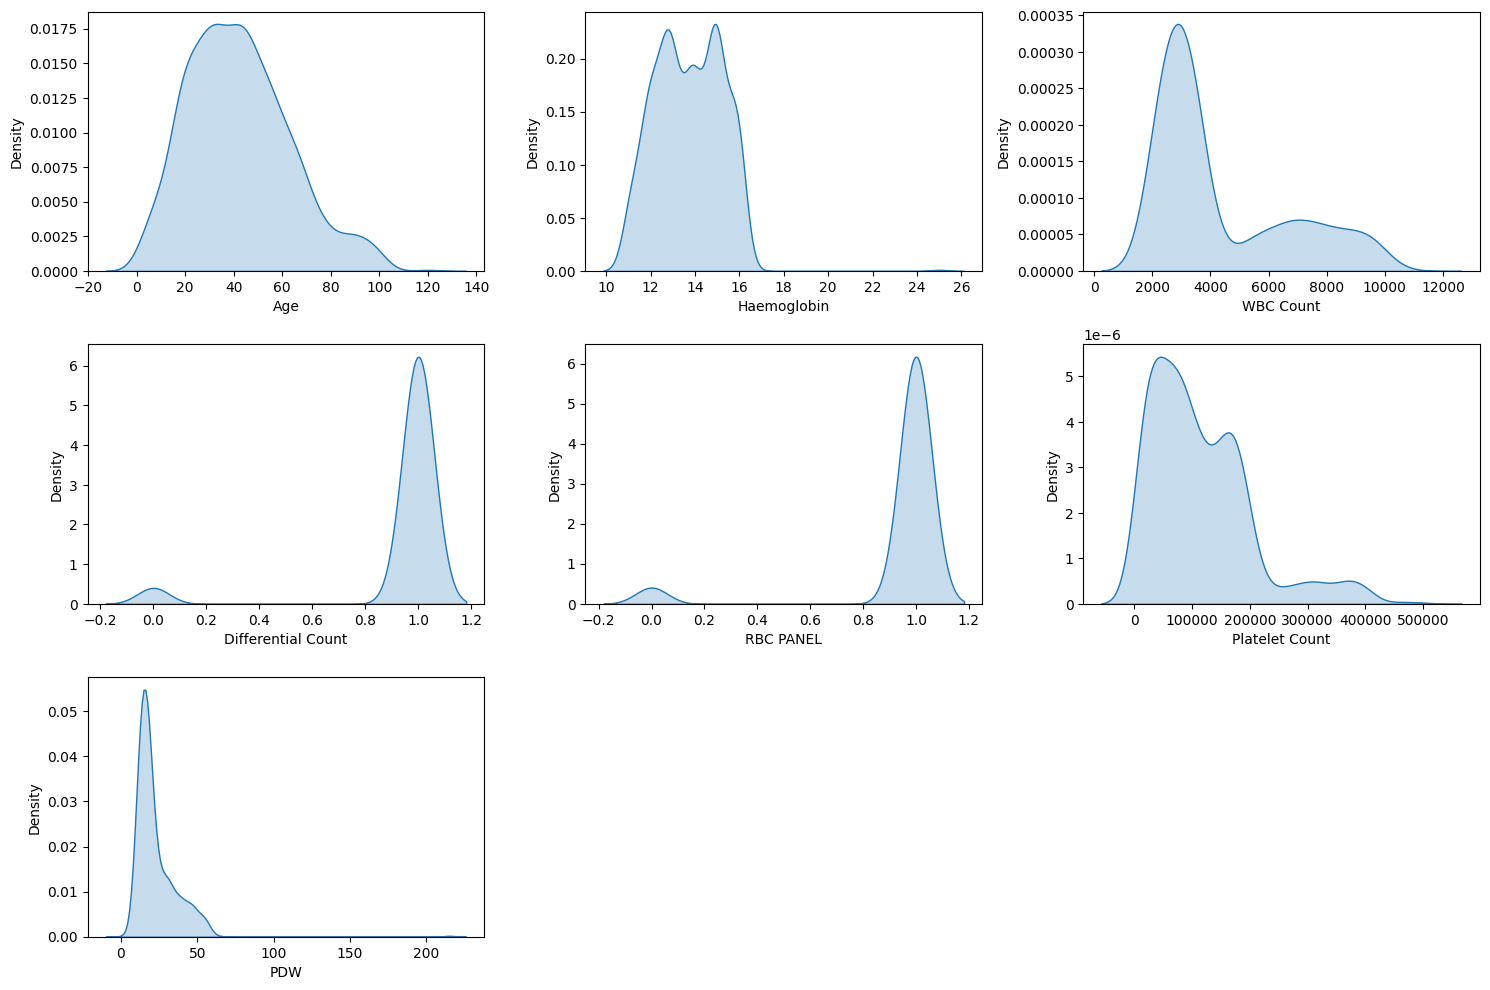

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for idx, col in enumerate(df.drop(columns=['Sex', 'Final Output']).select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, idx)
    sns.kdeplot(df[col], fill=True)
    plt.tight_layout()

plt.show()


In [12]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize

# Detect outliers using IQR and adjust them using Winsorization
for column in df.drop(columns='Final Output').columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers before Winsorization
    outlier_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    print(f"Feature: {column}, Outliers Detected: {outlier_count}")

    # Apply Winsorization to adjust outliers
    df[column] = winsorize(df[column], limits=[0.05, 0.05])  # 5% Winsorization

print("\nOutliers adjusted using Winsorization!")
print(df.head())


Feature: Age, Outliers Detected: 13
Feature: Sex, Outliers Detected: 0
Feature: Haemoglobin, Outliers Detected: 1
Feature: WBC Count, Outliers Detected: 1
Feature: Differential Count, Outliers Detected: 60
Feature: RBC PANEL, Outliers Detected: 61
Feature: Platelet Count, Outliers Detected: 40
Feature: PDW, Outliers Detected: 42

Outliers adjusted using Winsorization!
   Age  Sex  Haemoglobin  WBC Count  Differential Count  RBC PANEL  \
0   43    2         12.6     2200.0                   1          1   
1   45    2         13.2     3000.0                   0          1   
2   50    1         11.4     3300.0                   1          1   
3   57    1         11.9     3500.0                   1          0   
4   51    1         13.0     3100.0                   0          1   

   Platelet Count   PDW  Final Output  
0         62000.0  11.2           1.0  
1         17000.0  17.0           1.0  
2         19000.0  16.3           1.0  
3         29000.0  14.0           1.0  
4       

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 1002
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 989 non-null    int64  
 1   Sex                 989 non-null    int64  
 2   Haemoglobin         989 non-null    float64
 3   WBC Count           989 non-null    float64
 4   Differential Count  989 non-null    int64  
 5   RBC PANEL           989 non-null    int64  
 6   Platelet Count      989 non-null    float64
 7   PDW                 989 non-null    float64
 8   Final Output        989 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 77.3 KB


In [14]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

X = df.drop(columns='Final Output')
y = df['Final Output']

mi_scores = mutual_info_classif(X, y)
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='Mutual Information', ascending=False)

print("Mutual Information Scores:")
print(mi_scores_df)


Mutual Information Scores:
              Feature  Mutual Information
3           WBC Count            0.613467
6      Platelet Count            0.585005
7                 PDW            0.298916
5           RBC PANEL            0.035029
1                 Sex            0.008699
0                 Age            0.005909
4  Differential Count            0.003459
2         Haemoglobin            0.000000


In [15]:
from scipy import stats
import pandas as pd

X = df.drop(columns='Final Output')
y = df['Final Output']

anova_results = {}
for feature in X.columns:
    f_stat, p_val = stats.f_oneway(X[feature][y == 0], X[feature][y == 1])
    anova_results[feature] = {'F-stat': f_stat, 'p-value': p_val}

anova_results_df = pd.DataFrame(anova_results).T
anova_results_df = anova_results_df.sort_values(by='p-value')

# Add a column for significance status based on p-value
anova_results_df['Significance'] = anova_results_df['p-value'].apply(lambda p: 'Significant' if p < 0.05 else 'Not Significant')

# Print the results
print("\nANOVA Results (p-values and significance status):")
print(anova_results_df)



ANOVA Results (p-values and significance status):
                         F-stat        p-value     Significance
WBC Count           5250.783772   0.000000e+00      Significant
Platelet Count      1937.739279  4.735289e-235      Significant
PDW                  247.550094   6.135130e-50      Significant
RBC PANEL             32.040338   1.978702e-08      Significant
Differential Count    31.463338   2.638616e-08      Significant
Age                   22.222749   2.776458e-06      Significant
Sex                    0.820262   3.653247e-01  Not Significant
Haemoglobin            0.042441   8.368238e-01  Not Significant


In [16]:

significant_features = anova_results_df[anova_results_df['p-value'] < 0.05].index
significant_features = significant_features.append(pd.Index(['Final Output']))


df_significant = df[significant_features]


print(f"Shape of the dataframe with significant features and Final Output: {df_significant.shape}")


Shape of the dataframe with significant features and Final Output: (989, 7)


In [17]:
df_significant

WBC Count  Platelet Count   PDW  RBC PANEL  Differential Count  Age  \
0        2200.0         62000.0  11.2          1                   1   43   
1        3000.0         17000.0  17.0          1                   0   45   
2        3300.0         19000.0  16.3          1                   1   50   
3        3500.0         29000.0  14.0          0                   1   57   
4        3100.0         30000.0  14.5          1                   0   51   
...         ...             ...   ...        ...                 ...  ...   
998      9200.0        320000.0  39.9          1                   1   27   
999      7400.0        320000.0  48.0          1                   1   19   
1000     7500.0        320000.0  44.4          1                   1   54   
1001     9200.0        320000.0  41.9          1                   1   34   
1002     6700.0        175000.0  48.0          1                   1   32   

      Final Output  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0  
...            ...  
998            0.0  
999            0.0  
1000           0.0  
1001           0.0  
1002           0.0  

[989 rows x 7 columns]

In [18]:
# Keep only the selected features in the dataframe
selected_columns = df_significant.columns[[0, 1, 2, 6]]
df_selected = df_significant[selected_columns]

print(df_selected.head())


   WBC Count  Platelet Count   PDW  Final Output
0     2200.0         62000.0  11.2           1.0
1     3000.0         17000.0  17.0           1.0
2     3300.0         19000.0  16.3           1.0
3     3500.0         29000.0  14.0           1.0
4     3100.0         30000.0  14.5           1.0


In [19]:
df_selected

WBC Count  Platelet Count   PDW  Final Output
0        2200.0         62000.0  11.2           1.0
1        3000.0         17000.0  17.0           1.0
2        3300.0         19000.0  16.3           1.0
3        3500.0         29000.0  14.0           1.0
4        3100.0         30000.0  14.5           1.0
...         ...             ...   ...           ...
998      9200.0        320000.0  39.9           0.0
999      7400.0        320000.0  48.0           0.0
1000     7500.0        320000.0  44.4           0.0
1001     9200.0        320000.0  41.9           0.0
1002     6700.0        175000.0  48.0           0.0

[989 rows x 4 columns]

In [20]:
df_selected['Final Output'] = df_selected['Final Output'].astype(int)


<ipython-input-20-0a8e3edddb54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Final Output'] = df_selected['Final Output'].astype(int)


In [21]:
pip install boruta


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 3.7 MB/s eta 0:00:00


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Splitting the dataframe
train_df, test_df = train_test_split(df_selected, test_size=0.20, random_state=42, stratify=df['Final Output'])

# Display value counts of Final Output
print("Training Set Final Output Distribution:")
print(train_df['Final Output'].value_counts())

print("\nTest Set Final Output Distribution:")
print(test_df['Final Output'].value_counts())


Training Set Final Output Distribution:
Final Output
1    535
0    256
Name: count, dtype: int64

Test Set Final Output Distribution:
Final Output
1    134
0     64
Name: count, dtype: int64


In [23]:
pip install tensorflow keras


In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Assuming df_selected is your training dataframe and 'Final Output' is the target column
X = train_df.drop('Final Output', axis=1).values
y = train_df['Final Output']

# Identify minority class
minority_class = y.value_counts().idxmin()
num_samples_to_generate = y.value_counts().max() - y.value_counts().min()

# Create a GAN model
def build_generator():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=100))
    model.add(Dense(X.shape[1], activation='sigmoid'))
    return model

def build_discriminator():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_gan(generator, discriminator):
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    discriminator.trainable = False
    gan_input = Sequential()
    gan_input.add(generator)
    gan_input.add(discriminator)
    gan_input.compile(loss='binary_crossentropy', optimizer=Adam())
    return gan_input

# Build and compile models
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Train GAN
for epoch in range(1000):
    # Select a random batch of real samples
    idx = np.random.randint(0, X.shape[0], size=32)
    real_samples = X[idx]

    # Generate fake samples
    noise = np.random.normal(0, 1, size=(32, 100))
    fake_samples = generator.predict(noise)

    # Labels for real and fake samples
    real_labels = np.ones((32, 1))
    fake_labels = np.zeros((32, 1))

    # Train the discriminator
    discriminator.train_on_batch(real_samples, real_labels)
    discriminator.train_on_batch(fake_samples, fake_labels)

    # Train the generator
    noise = np.random.normal(0, 1, size=(32, 100))
    gan_labels = np.ones((32, 1))
    gan.train_on_batch(noise, gan_labels)

# Generate synthetic samples
noise = np.random.normal(0, 1, size=(num_samples_to_generate, 100))
synthetic_samples = generator.predict(noise)

# Create a new dataframe for synthetic samples
synthetic_df = pd.DataFrame(synthetic_samples, columns=train_df.drop('Final Output', axis=1).columns)
synthetic_df['Final Output'] = minority_class  # Assign minority class label

# Combine original and synthetic samples
balanced_train_df = pd.concat([train_df, synthetic_df], ignore_index=True)

# Check the new distribution
print("Balanced Training Set Final Output Distribution:")
print(balanced_train_df['Final Output'].value_counts())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = balanced_train_df.drop(columns=["Final Output"])
X_test = test_df.drop(columns=["Final Output"])

balanced_train_df.loc[:, X_train.columns] = scaler.fit_transform(X_train)
test_df.loc[:, X_test.columns] = scaler.transform(X_test)


In [94]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
import numpy as np
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Assuming balanced_train_df is already preprocessed
X = balanced_train_df.drop(columns='Final Output')
y = balanced_train_df['Final Output'].astype(int)

# Add noise for DecisionTree
def add_noise(X, noise_factor=0.1):
    noise = np.random.normal(0, noise_factor, X.shape)
    return X + noise

# Define models
models = {
    "SVC": SVC(C=2.0, kernel='rbf', gamma='scale', degree=3, class_weight='balanced', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=30, p=2, weights='uniform'),
 "DecisionTree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5,
                                           max_features='sqrt', random_state=42, ccp_alpha=0.01),

}

# Train and evaluate ML models
training_reports = {}
training_times = {}

for model_name, model in models.items():
    X_train = add_noise(X) if model_name == "DecisionTree" else X

    start_time = time.time()
    model.fit(X_train, y)
    end_time = time.time()

    training_times[model_name] = end_time - start_time
    y_pred = model.predict(X)
    training_reports[model_name] = classification_report(y, y_pred, digits=4)

# ANN Model
def create_ann(input_dim):
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.2),

        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.22),

        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

ann_model = create_ann(input_dim=X.shape[1])
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

start_time = time.time()
ann_model.fit(X, y, epochs=50, batch_size=32, verbose=0, callbacks=[early_stopping])
end_time = time.time()

training_times["ANN"] = end_time - start_time

y_pred_ann_prob = ann_model.predict(X)
y_pred_ann_classes = (y_pred_ann_prob > 0.5).astype(int)

training_reports["ANN"] = classification_report(y, y_pred_ann_classes, digits=4)

# Print results
for model_name in list(models.keys()) + ["ANN"]:
    print(f"Model: {model_name}")
    print(f"Training Time: {training_times[model_name]:.4f} seconds")
    print("Classification Report:")
    print(training_reports[model_name])
    print("="*50)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Model: SVC
Training Time: 0.0259 seconds
Classification Report:
              precision    recall  f1-score   support

           0     0.9944    0.9944    0.9944       535
           1     0.9944    0.9944    0.9944       535

    accuracy                         0.9944      1070
   macro avg     0.9944    0.9944    0.9944      1070
weighted avg     0.9944    0.9944    0.9944      1070

Model: KNN
Training Time: 0.0025 seconds
Classification Report:
              precision    recall  f1-score   support

           0     0.9981    0.9944    0.9963       535
           1     0.9944    0.9981    0.9963       535

    accuracy                         0.9963      1070
   macro avg     0.9963    0.9963    0.9963      1070
weighted avg     0.9963    0.9963    0.9963      1070

Model: DecisionTree
Training Time: 0.0029 seconds
Classification Report:
              precision    recall  f1-score   support

           0     0.9963    1.0000    0.9981       5

In [95]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Define 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results = {}

# Perform cross-validation for ML models
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    cv_results[model_name] = {
        "Mean Accuracy": np.mean(scores),
        "Standard Deviation": np.std(scores),
        "Fold-wise Accuracies": scores
    }

# Perform cross-validation for ANN
ann_accuracies = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    ann_model = create_ann(input_dim=X.shape[1])
    ann_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, callbacks=[early_stopping])

    y_pred_ann_prob = ann_model.predict(X_test)
    y_pred_ann_classes = (y_pred_ann_prob > 0.5).astype(int)
    acc = np.mean(y_pred_ann_classes.flatten() == y_test.values)
    ann_accuracies.append(acc)

cv_results["ANN"] = {
    "Mean Accuracy": np.mean(ann_accuracies),
    "Standard Deviation": np.std(ann_accuracies),
    "Fold-wise Accuracies": ann_accuracies
}

# Print cross-validation results
for model_name, results in cv_results.items():
    print(f"Model: {model_name}")
    print(f"Mean Accuracy: {results['Mean Accuracy']:.4f}")
    print(f"Standard Deviation: {results['Standard Deviation']:.4f}")
    print(f"Fold-wise Accuracies: {results['Fold-wise Accuracies']}")
    print("="*50)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Model: SVC
Mean Accuracy: 0.9935
Standard Deviation: 0.0094
Fold-wise Accuracies: [1.         1.         0.99065421 0.98130841 0.97196262 1.
 1.         1.         1.         0.99065421]
Model: KNN
Mean Accuracy: 0.9953
Standard Deviation: 0.0086
Fold-wise Accuracies: [1.         1.         0.99065421 1.         0.97196262 1.
 1.         1.         0.99065421 1.        ]
Model: DecisionTree
Mean Accuracy: 0.9935
Standard Deviation: 0.0103
Fold-wise Accuracies: [1.         1.         0.98130841 0.98130841 0.97196262 1.
 1.         1.         1.         1.        ]
Model: ANN
Mean Accuracy: 0.9944
Standard Deviation: 0.0075
Fold-wise Accuracies: [np.float64(1.0), np.float64(1.0), np.float64(0.9906542056074766), np.float64(0.9813084112149533), np.float64(0.9813084112149533), np.float64(0.9906542056074766), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]


In [84]:
from sklearn.metrics import classification_report, roc_auc_score
import time
X_test = test_df.drop(columns='Final Output')  # Features from test set
y_test = test_df['Final Output'].astype(int)  # Target labels as integers

testing_reports = {}
testing_times = {}
auc_scores = {}

for model_name, model in models.items():
    start_time = time.time()
    y_test_pred = model.predict(X_test)
    testing_times[model_name] = time.time() - start_time

    # Compute AUC
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_test_prob = model.decision_function(X_test)

    auc_scores[model_name] = roc_auc_score(y_test, y_test_prob)
    testing_reports[model_name] = classification_report(y_test, y_test_pred, digits=4)

# ANN Testing
start_time = time.time()
y_test_prob_ann = ann_model.predict(X_test)
y_test_pred_ann = (y_test_prob_ann > 0.5).astype(int)
testing_times["ANN"] = time.time() - start_time

auc_scores["ANN"] = roc_auc_score(y_test, y_test_prob_ann)
testing_reports["ANN"] = classification_report(y_test, y_test_pred_ann, digits=4)

# Print results
for model_name in list(models.keys()) + ["ANN"]:
    print(f"Model: {model_name}")
    print(f"Testing Time: {testing_times[model_name]:.4f} seconds")
    print(f"AUC Score: {auc_scores[model_name]:.4f}")
    print("Testing Classification Report:")
    print(testing_reports[model_name])
    print("="*50)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: SVC
Testing Time: 0.0027 seconds
AUC Score: 0.9827
Testing Classification Report:
              precision    recall  f1-score   support

           0     0.9844    0.9844    0.9844        64
           1     0.9925    0.9925    0.9925       134

    accuracy                         0.9899       198
   macro avg     0.9885    0.9885    0.9885       198
weighted avg     0.9899    0.9899    0.9899       198

Model: KNN
Testing Time: 0.0183 seconds
AUC Score: 0.9883
Testing Classification Report:
              precision    recall  f1-score   support

           0     0.9844    0.9844    0.9844        64
           1     0.9925    0.9925    0.9925       134

    accuracy                         0.9899       198
   macro avg     0.9885    0.9885    0.9885       198
weighted avg     0.9899    0.9899    0.9899       198

Model: DecisionTree
Testing Time: 0.0013 seconds
AUC Score: 0.9964
Testing Classification Report:
              precision    recal

In [85]:
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score, brier_score_loss

mcc_scores = {}
kappa_scores = {}
brier_scores = {}

for model_name, model in models.items():
    y_test_pred = model.predict(X_test)

    mcc_scores[model_name] = matthews_corrcoef(y_test, y_test_pred)
    kappa_scores[model_name] = cohen_kappa_score(y_test, y_test_pred)

    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_test_prob = model.decision_function(X_test)

    brier_scores[model_name] = brier_score_loss(y_test, y_test_prob)

# ANN Metrics
mcc_scores["ANN"] = matthews_corrcoef(y_test, y_test_pred_ann)
kappa_scores["ANN"] = cohen_kappa_score(y_test, y_test_pred_ann)
brier_scores["ANN"] = brier_score_loss(y_test, y_test_prob_ann)

# Print results
for model_name in list(models.keys()) + ["ANN"]:
    print(f"Model: {model_name}")
    print(f"MCC: {mcc_scores[model_name]:.4f}")
    print(f"Kappa: {kappa_scores[model_name]:.4f}")
    print(f"Brier Score: {brier_scores[model_name]:.4f}")
    print("=" * 50)


Model: SVC
MCC: 0.9769
Kappa: 0.9769
Brier Score: 0.0149
Model: KNN
MCC: 0.9769
Kappa: 0.9769
Brier Score: 0.0125
Model: DecisionTree
MCC: 0.9886
Kappa: 0.9885
Brier Score: 0.0050
Model: ANN
MCC: 0.9770
Kappa: 0.9767
Brier Score: 0.0067


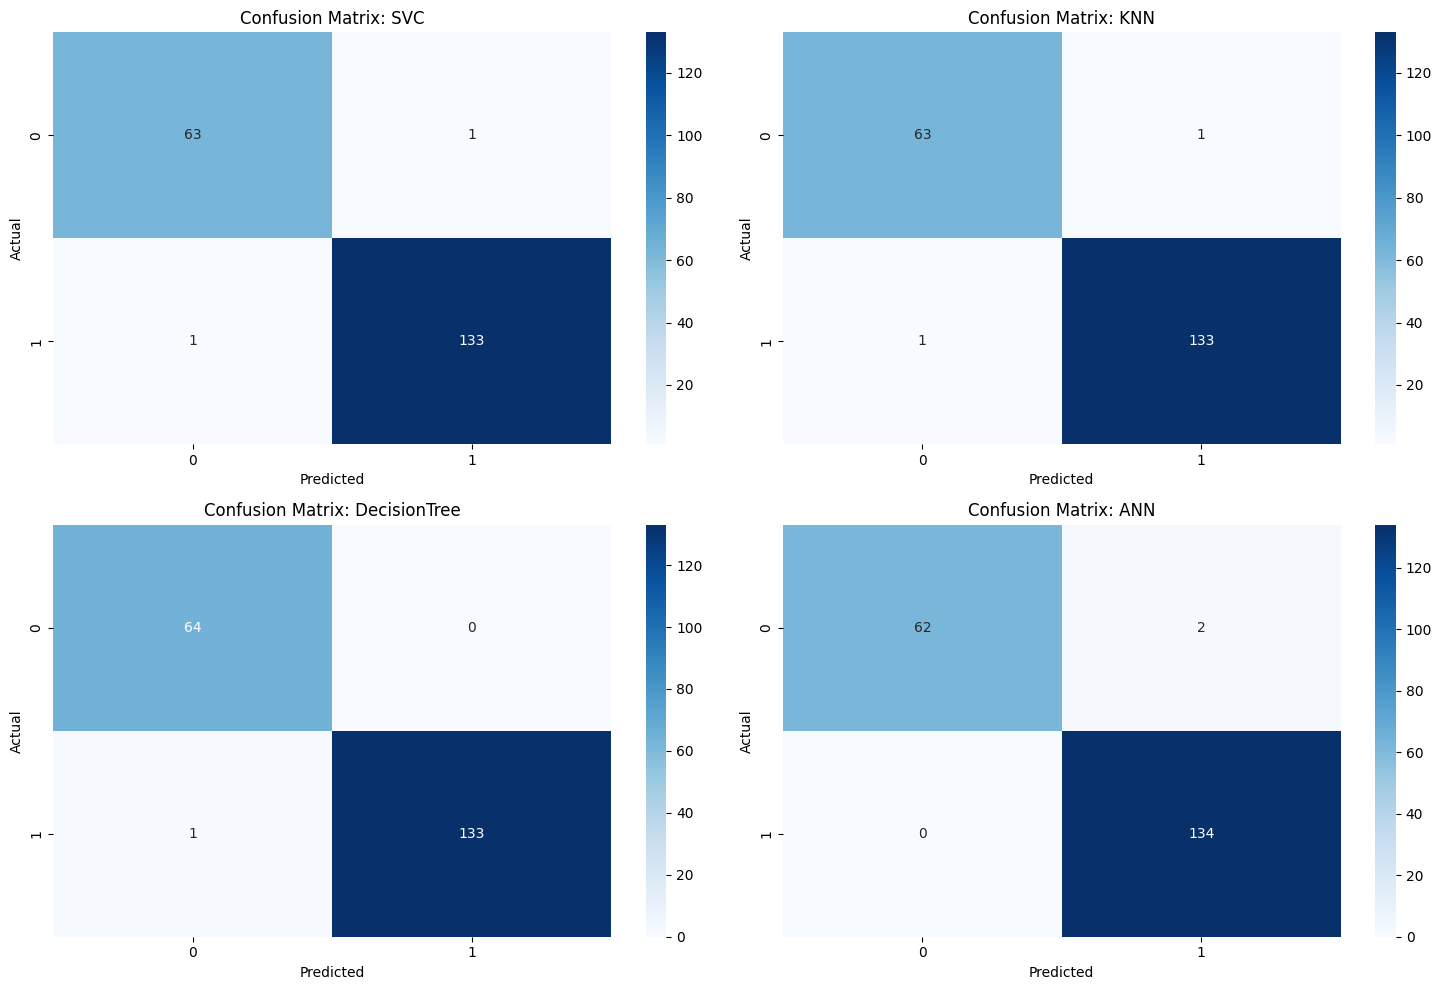

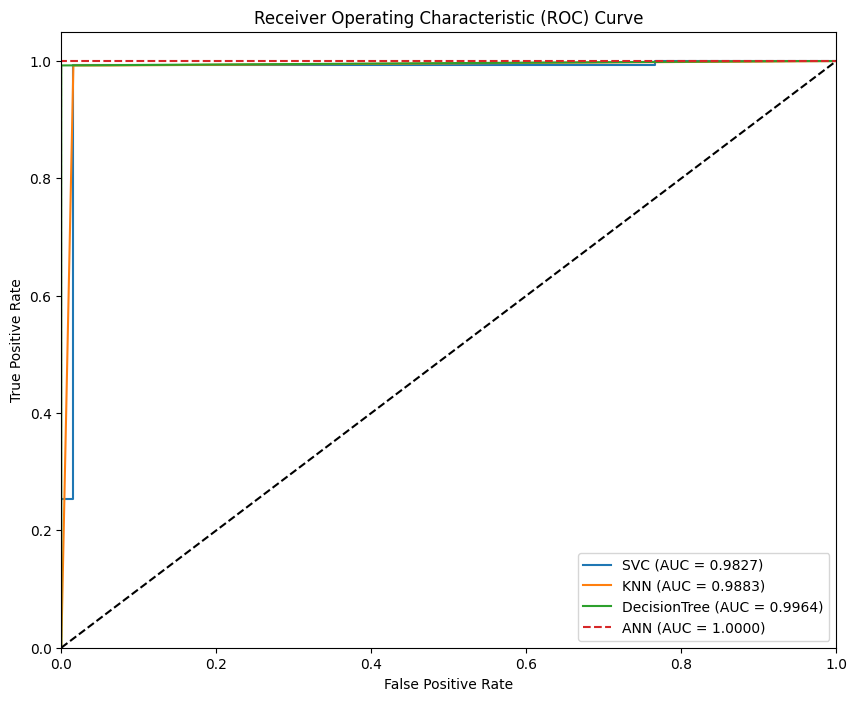

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Plot Confusion Matrices
fig, axes = plt.subplots(2, len(models) // 2 + 1, figsize=(15, 10))
axes = axes.ravel()

for i, (model_name, model) in enumerate(models.items()):
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix: {model_name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# ANN Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_ann)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1], ax=axes[len(models)])
axes[len(models)].set_title("Confusion Matrix: ANN")
axes[len(models)].set_xlabel("Predicted")
axes[len(models)].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Plot ROC Curve
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_test_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")

# ANN ROC Curve
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_test_prob_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)
plt.plot(fpr_ann, tpr_ann, label=f"ANN (AUC = {roc_auc_ann:.4f})", linestyle="--")

# Final Plot Settings
plt.plot([0, 1], [0, 1], "k--")  # Diagonal baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


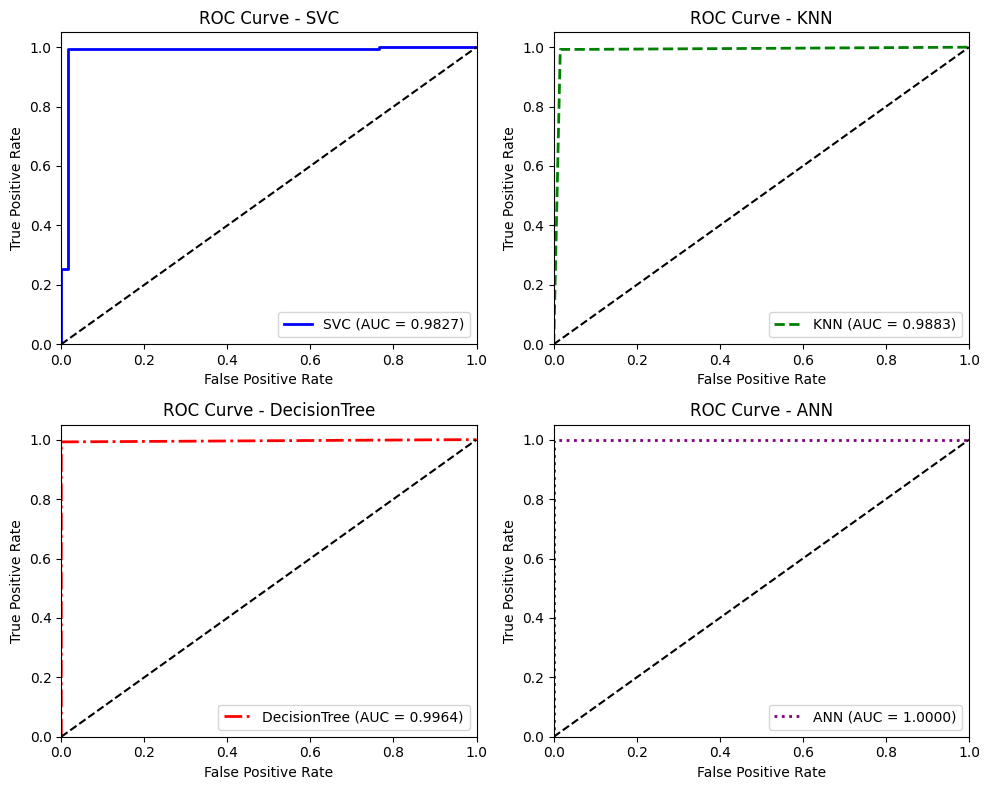

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Define unique styles for each ROC plot
roc_styles = [
    {"color": "blue", "linestyle": "-", "linewidth": 2},   # Solid Line (Blue)
    {"color": "green", "linestyle": "--", "linewidth": 2}, # Dashed Line (Green)
    {"color": "red", "linestyle": "-.", "linewidth": 2},   # Dash-Dot Line (Red)
    {"color": "purple", "linestyle": ":", "linewidth": 2}  # Dotted Line (Purple)
]

plt.figure(figsize=(10, 8))

# Iterate over models and create 4 subplots
for i, (model_name, model) in enumerate(models.items()):
    if i >= 4:
        break  # Only create 4 plots

    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_test_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    plt.subplot(2, 2, i+1)  # 2x2 grid layout
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})", **roc_styles[i])
    plt.plot([0, 1], [0, 1], "k--")  # Diagonal baseline
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")

# ANN ROC Curve in the 4th plot
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_test_prob_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)
plt.subplot(2, 2, 4)
plt.plot(fpr_ann, tpr_ann, label=f"ANN (AUC = {roc_auc_ann:.4f})", **roc_styles[3])
plt.plot([0, 1], [0, 1], "k--")  # Diagonal baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ANN")
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


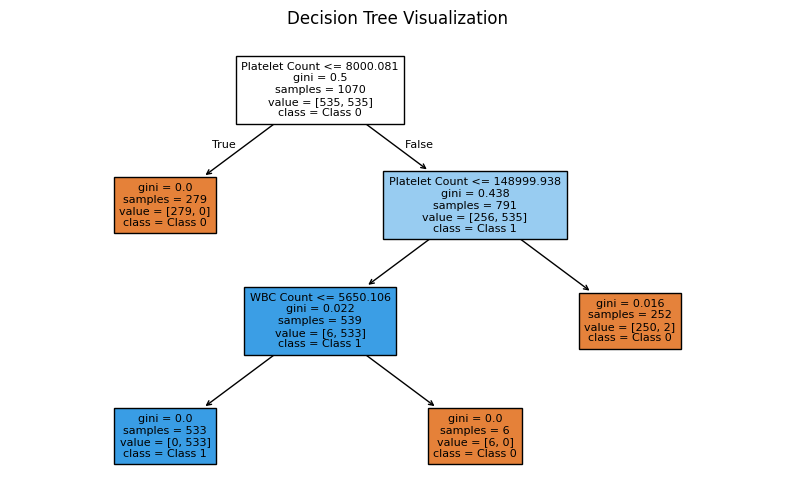

In [63]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Ensure that DecisionTree model exists in models dictionary
if "DecisionTree" in models:
    dt_model = models["DecisionTree"]

    # Plot the Decision Tree
    plt.figure(figsize=(10, 6))
    plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"], fontsize=8)
    plt.title("Decision Tree Visualization")
    plt.show()
else:
    print("DecisionTree model not found in the models dictionary.")


In [54]:
import joblib

# Save the trained Decision Tree model to a file
joblib.dump(models['DecisionTree'], 'decision_tree_model.pkl')


['decision_tree_model.pkl']

In [66]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e38f14082d1d6883069e9583e180cc7459379a49d90f0282cf313dde19817086
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


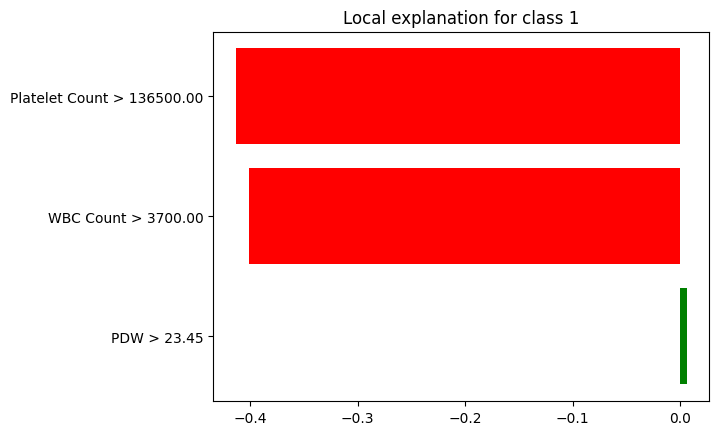

In [67]:
import numpy as np
import lime
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Assuming you have a trained DecisionTree model and test data (X_test, y_test)
# Create an explainer object using the training dataset (X)
explainer = LimeTabularExplainer(
    training_data=X.values,
    feature_names=X.columns,
    class_names=np.unique(y_test).astype(str),
    mode='classification'
)

# Select an instance to explain (e.g., first instance in X_test)
instance = X_test.iloc[0].values.reshape(1, -1)

# Explain the prediction for this instance
explanation = explainer.explain_instance(instance[0], models['DecisionTree'].predict_proba)

# Show the explanation (features and their importance)
explanation.show_in_notebook(show_table=True, show_all=False)

# If you prefer to visualize the explanation
fig = explanation.as_pyplot_figure()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


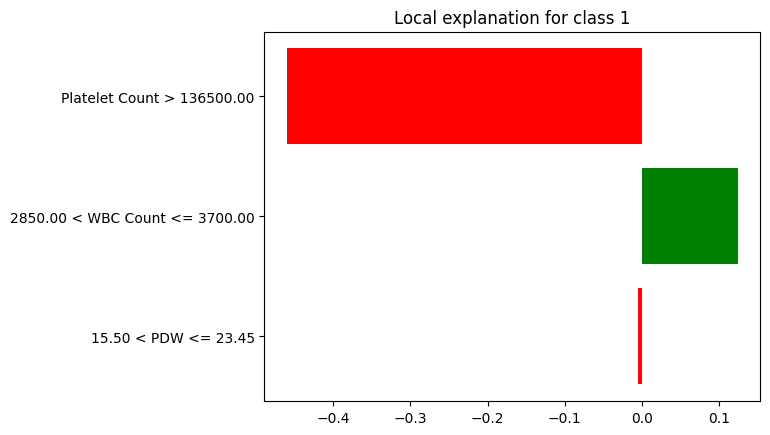

In [68]:
import numpy as np
import lime
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt


explainer = LimeTabularExplainer(
    training_data=X.values,
    feature_names=X.columns,
    class_names=np.unique(y_test).astype(str),
    mode='classification'
)


instance = X_test.iloc[11].values.reshape(1, -1)

# Explain the prediction for this instance
explanation = explainer.explain_instance(instance[0], models['DecisionTree'].predict_proba)

# Show the explanation (features and their importance)
explanation.show_in_notebook(show_table=True, show_all=False)

# If you prefer to visualize the explanation
fig = explanation.as_pyplot_figure()
plt.show()


In [73]:
pip install SALib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.0 MB/s eta 0:00:00


                   mu  mu_star     sigma  mu_star_conf
WBC Count      -0.702    0.702  0.749212      0.064251
Platelet Count -0.774    0.774  0.750367      0.059830
PDW             0.000    0.000  0.000000      0.000000
          Feature  Mu (Mean Impact)  Mu* (Absolute Mean Impact)  \
1  Platelet Count            -0.774                       0.774   
0       WBC Count            -0.702                       0.702   
2             PDW             0.000                       0.000   

   Sigma (Std Dev)  
1         0.750367  
0         0.749212  
2         0.000000  


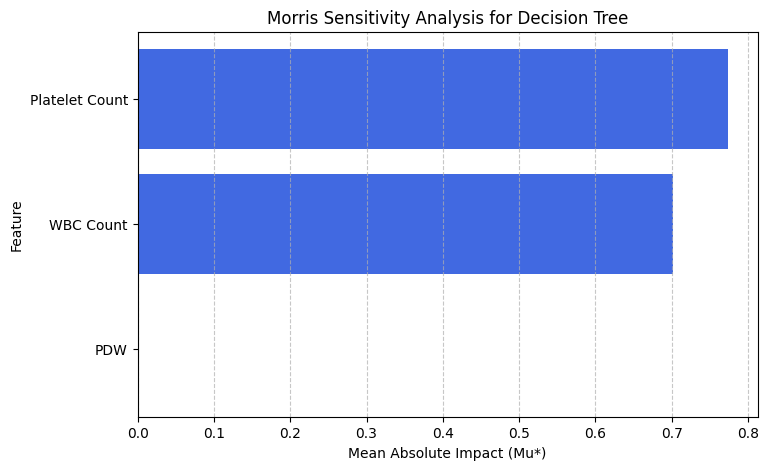

In [77]:
from SALib.analyze import morris
from SALib.sample.morris import sample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the problem space
problem = {
    'num_vars': 3,  # Since we have only 3 features
    'names': list(X_test.columns),  # Feature names
    'bounds': [[X_test[col].min(), X_test[col].max()] for col in X_test.columns]  # Min-max range
}

# Generate sample points using Morris sampling
param_values = sample(problem, N=500, num_levels=4)

# Convert sampled values to DataFrame
param_df = pd.DataFrame(param_values, columns=X_test.columns)

# Predict using the trained Decision Tree model
y_pred = models["DecisionTree"].predict(param_df).astype(float)  # ✅ Convert to float

# Perform Morris Sensitivity Analysis
Si = morris.analyze(problem, param_values, y_pred, conf_level=0.95, print_to_console=True)

# Convert results into a DataFrame
morris_df = pd.DataFrame({
    "Feature": problem["names"],
    "Mu (Mean Impact)": Si["mu"],
    "Mu* (Absolute Mean Impact)": Si["mu_star"],  # ✅ Corrected key
    "Sigma (Std Dev)": Si["sigma"]
}).sort_values(by="Mu* (Absolute Mean Impact)", ascending=False)  # ✅ Corrected sorting key

# Print feature importance ranking
print(morris_df)

# 🔹 **Plot Morris Sensitivity Results** 🔹
plt.figure(figsize=(8, 5))
plt.barh(morris_df["Feature"], morris_df["Mu* (Absolute Mean Impact)"], color='royalblue')
plt.xlabel("Mean Absolute Impact (Mu*)")
plt.ylabel("Feature")
plt.title("Morris Sensitivity Analysis for Decision Tree")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [78]:
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd

# Compute permutation importance
perm_importance = permutation_importance(models["DecisionTree"], X_test, y_test, n_repeats=30, random_state=42)

# Convert results to a DataFrame
perm_importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": perm_importance.importances_mean,
    "Std Dev": perm_importance.importances_std
}).sort_values(by="Importance", ascending=False)

# Display results
print(perm_importance_df)


          Feature  Importance   Std Dev
1  Platelet Count    0.236869  0.018504
0       WBC Count    0.206902  0.018647
2             PDW    0.000000  0.000000


Selected Features: [0 1 2]


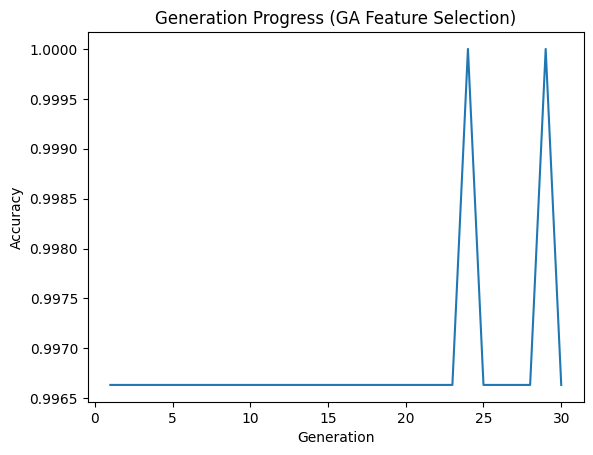

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

class GeneticAlgorithmFS:
    def __init__(self, X, y, num_generations=30, population_size=40, crossover_prob=0.6, mutation_prob=0.05, tournament_size=3):
        self.X = X
        self.y = y
        self.num_generations = num_generations
        self.population_size = population_size
        self.crossover_prob = crossover_prob
        self.mutation_prob = mutation_prob
        self.tournament_size = tournament_size
        self.best_features = None
        self.best_accuracy = 0
        self.generation_progress = []
        self.best_fitness = []

    def fitness(self, chromosome):
        selected_features = np.where(chromosome == 1)[0]
        if len(selected_features) == 0:
            return 0  # No features selected
        X_selected = self.X[:, selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, self.y, test_size=0.3, random_state=42)
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        return score

    def crossover(self, parent1, parent2):
        point = np.random.randint(1, len(parent1))
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2

    def mutate(self, chromosome):
        mutation = np.random.rand(len(chromosome)) < self.mutation_prob
        chromosome[mutation] = 1 - chromosome[mutation]  # Flip the gene
        return chromosome

    def select_parents(self, population, fitness_values):
        parents = []
        for _ in range(self.population_size // 2):
            tournament_indices = np.random.choice(len(population), self.tournament_size, replace=False)
            tournament_fitness = fitness_values[tournament_indices]
            winner_index = tournament_indices[np.argmax(tournament_fitness)]
            parents.append(population[winner_index])

        if len(parents) % 2 != 0:
            parents.append(population[np.argmax(fitness_values)])

        return parents

    def optimize(self):
        population = np.random.randint(0, 2, size=(self.population_size, self.X.shape[1]))
        for generation in range(self.num_generations):
            fitness_values = np.array([self.fitness(chromosome) for chromosome in population])
            best_gen_fitness = np.max(fitness_values)
            self.generation_progress.append(best_gen_fitness)

            if best_gen_fitness > self.best_accuracy:
                self.best_accuracy = best_gen_fitness
                self.best_features = population[np.argmax(fitness_values)]

            parents = self.select_parents(population, fitness_values)
            new_population = []

            for i in range(0, len(parents) - 1, 2):
                if np.random.rand() < self.crossover_prob:
                    child1, child2 = self.crossover(parents[i], parents[i + 1])
                    new_population.append(child1)
                    new_population.append(child2)
                else:
                    new_population.append(parents[i])
                    new_population.append(parents[i + 1])

            if len(parents) % 2 != 0:
                new_population.append(parents[-1])

            new_population = [self.mutate(chromosome) for chromosome in new_population]

            population = np.array(new_population)

        selected_features = np.where(self.best_features == 1)[0]
        return selected_features

    def plot_progress(self):
        plt.plot(range(1, self.num_generations + 1), self.generation_progress)
        plt.xlabel('Generation')
        plt.ylabel('Accuracy')
        plt.title('Generation Progress (GA Feature Selection)')
        plt.show()

# Assuming df_significant is already loaded
X = df_significant.drop(columns=['Final Output']).values
y = df_significant['Final Output'].values

ga_fs = GeneticAlgorithmFS(X, y, num_generations=30, population_size=40, crossover_prob=0.6, mutation_prob=0.05, tournament_size=3)

selected_features = ga_fs.optimize()

print("Selected Features:", selected_features)

ga_fs.plot_progress()
